<a href="https://colab.research.google.com/github/DSJibran/Hotel-Booking-EDA-Analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>




In [2]:
#Import the main libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [3]:
#Mounting Drive 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading CSV file 

df = pd.read_csv('/content/drive/MyDrive/Datasets/Hotel Bookings.csv')

In [5]:
# Checking dataset

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.shape

(119390, 32)

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
#Creating a new Kids column with Childern and babaies coulmns

df['kids'] = df['children'] + df['babies']

In [10]:
#Droping Unwanted Columns
df.drop(['company','children', 'babies', 'agent'], axis = 1, inplace = True)

In [11]:
# Droping duplicate values

df = df.drop_duplicates()

In [12]:
df.shape

(87369, 29)

In [13]:
#Checking null values in the Dataframe
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
meal                                0
country                           452
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_

In [14]:
df.dropna(inplace = True)

In [15]:
df.shape

(86913, 29)

In [16]:
 #Remaining Columns 
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'kids'],
      dtype='object')

In [17]:
#View some statistical details

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,kids
count,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000
mean,0.275943,80.202260,2016.211856,26.841646,15.818301,1.007559,2.628951,1.878603,0.039246,0.030237,0.176763,0.271904,0.753731,106.581162,0.083474,0.699539,0.150058
std,0.446991,86.103281,0.685980,13.654184,8.834477,1.028821,2.043871,0.625884,0.194181,0.369631,1.718149,0.728177,10.043367,54.959822,0.280441,0.831884,0.472662
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000,0.000000
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.410000,0.000000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,10.000000


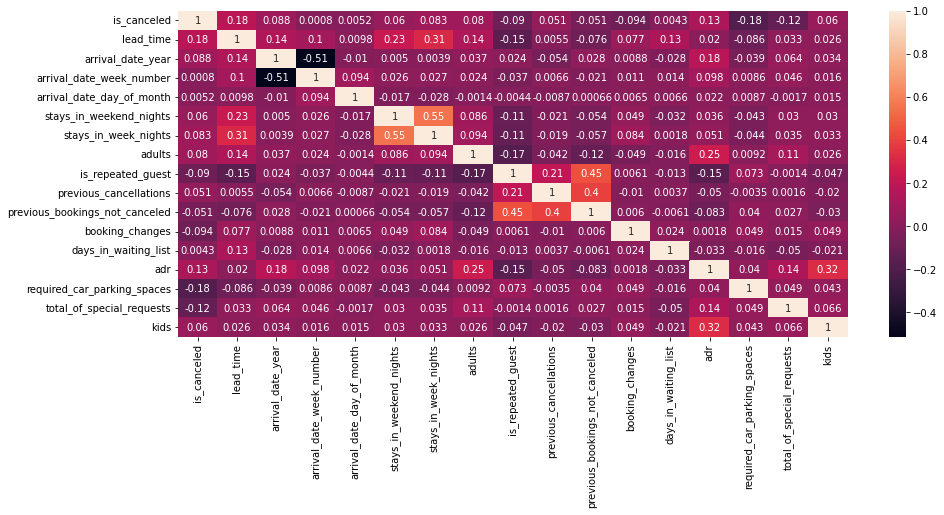

In [18]:
plt.figure(figsize=(15,6))

sns.heatmap(df.corr(), annot = True)


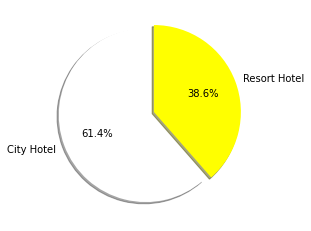

In [19]:
# HOTELS AND RESORT PERCENTAGE

labels = df['hotel'].value_counts().index.tolist()
sizes =df['hotel'].value_counts().tolist()
explode = (0,0.10)
colors = ['white', 'yellow']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow = True,startangle =90) ;

In [20]:
df['adults'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,53403.0,1.876486,0.544133,0.0,2.0,2.0,2.0,4.0
Resort Hotel,33510.0,1.881976,0.737671,0.0,2.0,2.0,2.0,55.0


In [21]:
df['kids'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,53403.0,0.139224,0.455788,0.0,0.0,0.0,0.0,10.0
Resort Hotel,33510.0,0.167323,0.497894,0.0,0.0,0.0,0.0,10.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


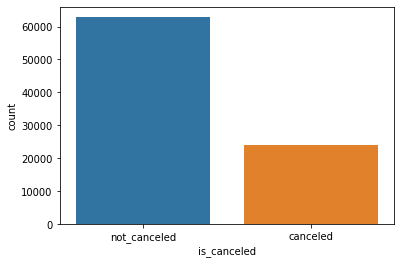

In [22]:
# TO check how frequent guest cancels booking

df['is_canceled'] = df.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
canceled_data =df['is_canceled']

sns.countplot(canceled_data)

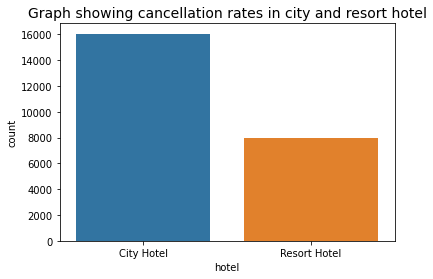

In [23]:
#Let's look into cancellation rate among different type of hotel.

lst1 = ['is_canceled', 'hotel']
type_of_hotel_canceled = df[lst1]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'canceled'].groupby(['hotel']).size().reset_index(name = 'count')

sns.barplot(data = canceled_hotel, x = 'hotel', y = 'count').set_title('Graph showing cancellation rates in city and resort hotel', fontsize = 14);


Text(0.5, 1.0, 'Graph showing yearly arrival')

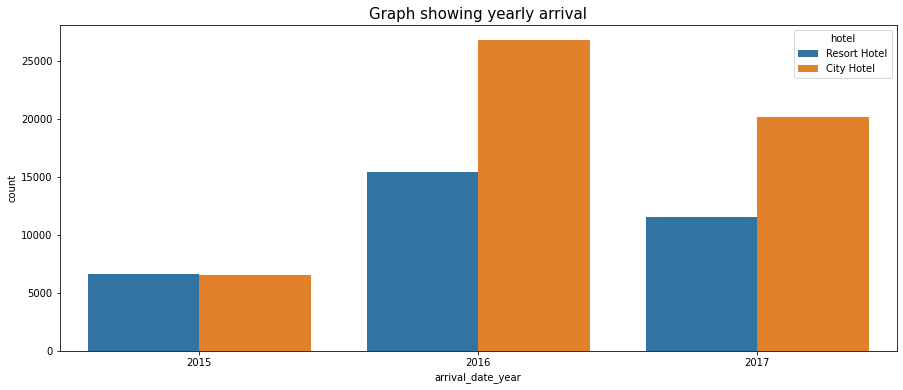

In [24]:
# Busy year for hotels 

plt.figure(figsize=(15,6))


sns.countplot(data = df, x = 'arrival_date_year', hue = 'hotel').set_title('Graph showing yearly arrival', fontsize =15)

Text(0, 0.5, 'Count')

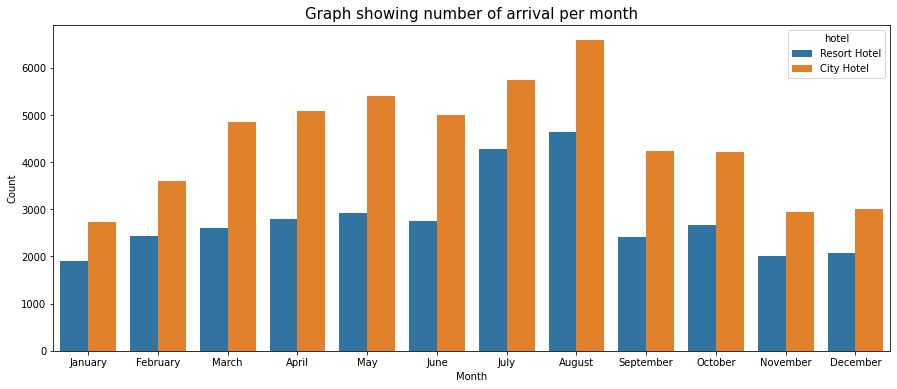

In [25]:
#Number of arrivals per months

plt.figure(figsize=(15,6))

sns.countplot(data = df, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrival per month',fontsize=15)
plt.xlabel('Month')
plt.ylabel('Count')

In [26]:
# august month total booking of each hotel
city_hotel_august = df.loc[(df['hotel']=="City Hotel") & (df['arrival_date_month']== 'August')].hotel.value_counts()
print(city_hotel_august)

# august month total booking of each hotel
resort_hotel_august = df.loc[(df['hotel']=="Resort Hotel") & (df['arrival_date_month']== 'August')].hotel.value_counts()
print(resort_hotel_august)

City Hotel    6586
Name: hotel, dtype: int64
Resort Hotel    4643
Name: hotel, dtype: int64


Text(0.5, 1.0, 'Graph showing number of arrival per day')

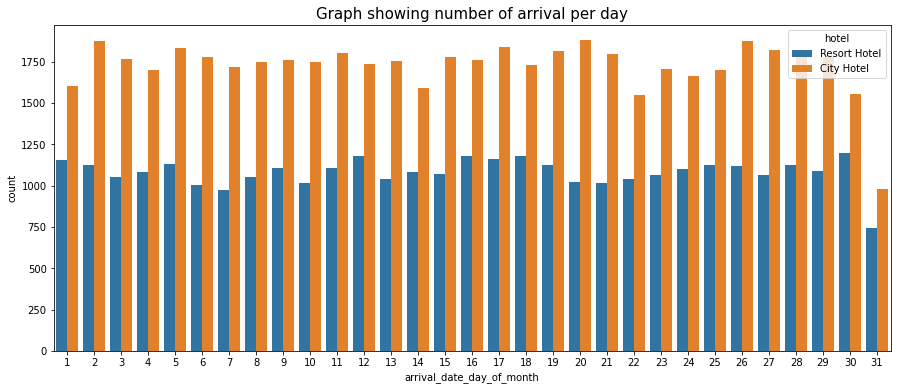

In [27]:
# Number of arrivals per day 
plt.figure(figsize=(15,6))

sns.countplot(data = df, x = 'arrival_date_day_of_month',hue='hotel').set_title('Graph showing number of arrival per day',fontsize=15) 

Text(0.5, 1.0, 'Graph showing guests require Car Parking')

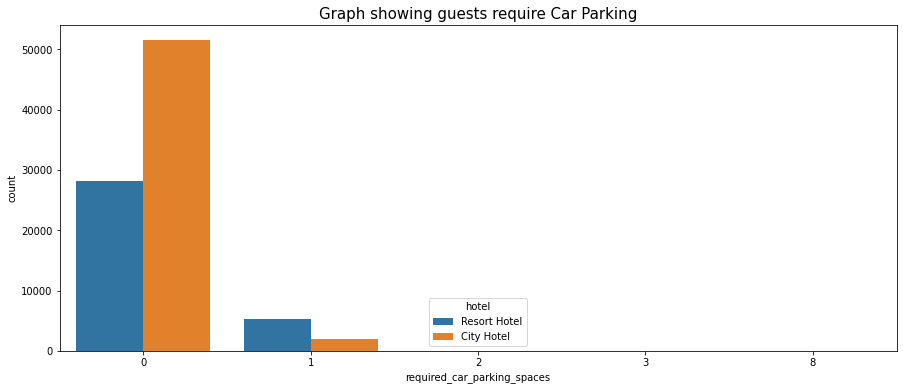

In [28]:
# guest requiring car parking 

plt.figure(figsize=(15,6))

sns.countplot(data = df, x = 'required_car_parking_spaces',hue='hotel').set_title('Graph showing guests require Car Parking',fontsize=15) 

In [29]:
df.required_car_parking_spaces.value_counts()

0    79706
1     7174
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

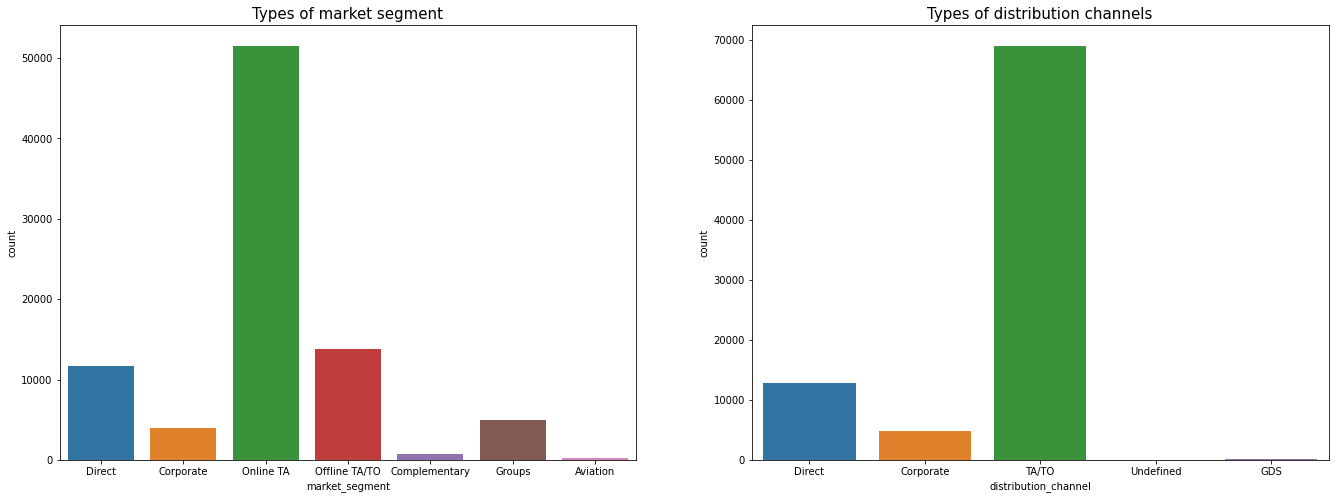

In [30]:
#Looking into market segments and distribution channel

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='market_segment', data=df)
plt.title('Types of market segment', size=15)

plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'distribution_channel')
plt.title('Types of distribution channels', size=15)
plt.subplots_adjust(right=1.3)

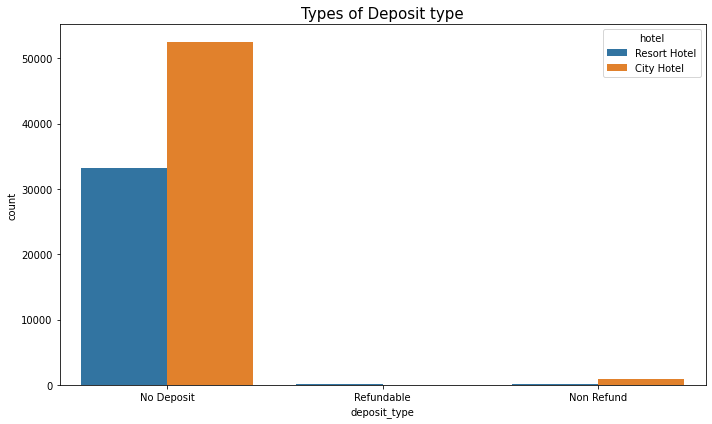

In [31]:
# Deposit type 

plt.figure(figsize=(10, 6))

sns.countplot(data = df, x = 'deposit_type',hue='hotel')
plt.title('Types of Deposit type', size=15)
plt.tight_layout()

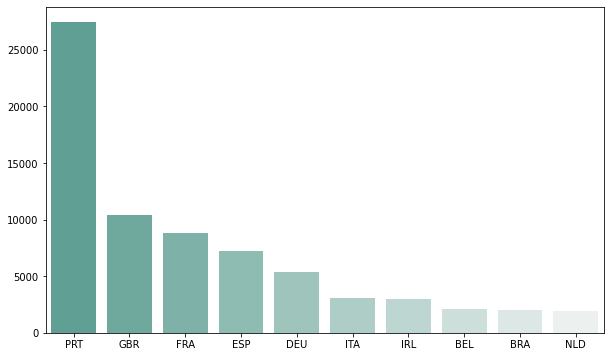

In [32]:
# From where the most guests are coming 

plt.figure(figsize=(10, 6))
sns.barplot (y= list(df.country.value_counts().head (10)), x= list(df.country.value_counts().head(10).index), palette = 'light:#5A9_r')


In [33]:
# country visitors with no cancellation

country_visitors = df[df['is_canceled'] == 'not_canceled'].groupby(['country']).size().reset_index(name = 'count')

# We will be using Plotly.express to plot a choropleth map

px.choropleth(country_visitors, locations = "country", color= "count", hover_name= "country",
              color_continuous_scale=px.colors.sequential.Greens, 
              title="Home country of visitors")

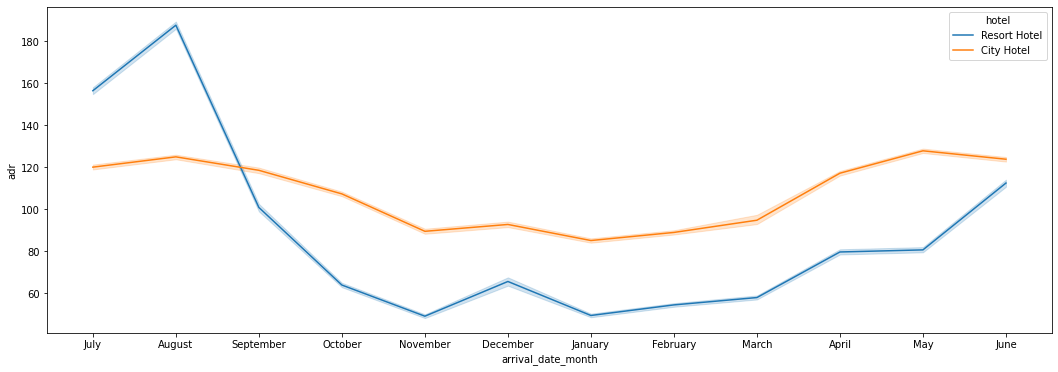

In [34]:
# Which months have cheaper booking rates?
plt.figure(figsize=(18,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



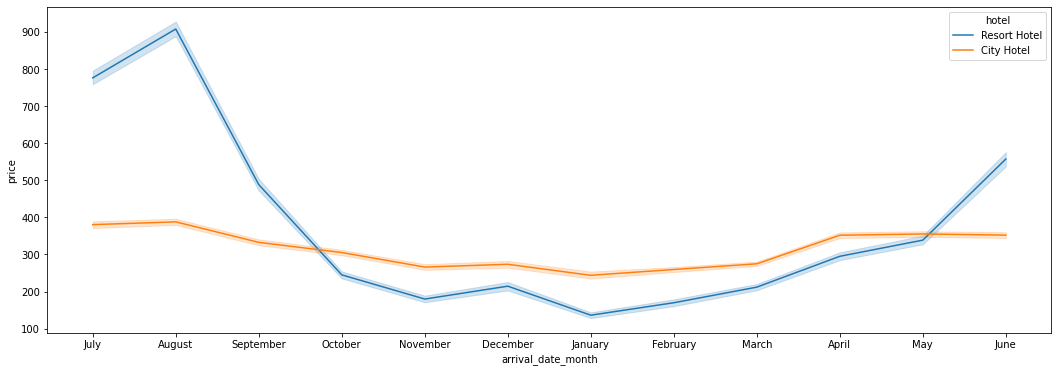

In [35]:
# Calculating average daily rate per person
plt.figure(figsize=(18,6))


df['adr_pp'] = df['adr'] / (df['adults'] + df['kids']) 
actual_guests = df.loc[df["is_canceled"] == 'not_canceled']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])

sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel');